Analysis of data (classification of particles) from the SeaFlow environmental flow cytometry instrument.

A flow cytometer delivers a flow of particles through capilliary. By shining lasers of different wavelengths and measuring the absorption and refraction patterns, you can determine how large the particle is and some information about its color and other properties, allowing you to detect it.

The technology was developed for medical applciations, where the particles were potential pathogens in, say, serum, and the goal was to give a diagnosis. But the technology was adapted for use in environmental science to understand microbial population profiles.

The SeaFlow instrument, developed by the Armbrust Lab at the University of Washington, is unique in that it is deployed on research vessels and takes continuous measurements of population profiles in the open ocean.

Dataset that represents a 21 minute sample from the vessel.

In [2]:
setwd("/home/gael/Bureau/UW_datasci/assignment5")

In [3]:
seaflow_21min <- read.csv(file="seaflow_21min.csv",head=TRUE,sep=",")

In [5]:
summary(seaflow_21min)

    file_id           time          cell_id            d1       
 Min.   :203.0   Min.   : 12.0   Min.   :    0   Min.   : 1328  
 1st Qu.:204.0   1st Qu.:174.0   1st Qu.: 7486   1st Qu.: 7296  
 Median :206.0   Median :362.0   Median :14995   Median :17728  
 Mean   :206.2   Mean   :341.5   Mean   :15008   Mean   :17039  
 3rd Qu.:208.0   3rd Qu.:503.0   3rd Qu.:22401   3rd Qu.:24512  
 Max.   :209.0   Max.   :643.0   Max.   :32081   Max.   :54048  
       d2          fsc_small        fsc_perp        fsc_big     
 Min.   :   32   Min.   :10005   Min.   :    0   Min.   :32384  
 1st Qu.: 9584   1st Qu.:31341   1st Qu.:13496   1st Qu.:32400  
 Median :18512   Median :35483   Median :18069   Median :32400  
 Mean   :17437   Mean   :34919   Mean   :17646   Mean   :32405  
 3rd Qu.:24656   3rd Qu.:39184   3rd Qu.:22243   3rd Qu.:32416  
 Max.   :54688   Max.   :65424   Max.   :63456   Max.   :32464  
       pe          chl_small        chl_big           pop       
 Min.   :    0   Min.   :

- file_id: The data arrives in files, where each file represents a three-minute window; this field represents which file the data came from. The number is ordered by time, but is otherwise not significant.
- time: This is an integer representing the time the particle passed through the instrument. Many particles may arrive at the same time; time is not a key for this relation.
- cell_id: A unique identifier for each cell WITHIN a file. (file_id, cell_id) is a key for this relation.
- d1, d2: Intensity of light at the two main sensors, oriented perpindicularly. These sensors are primarily used to determine whether the particles are properly centered in the stream. Used primarily in preprocesssing; they are unlikely to be useful for classification.
- fsc_small, fsc_perp, fsc_big: Forward scatter small, perpendicular, and big. These values help distingish different sizes of particles.
- pe: A measurement of phycoerythrin fluorescence, which is related to the wavelength associated with an orange color in microorganisms
- chl_small, chl_big: Measurements related to the wavelength of light corresponding to chlorophyll.
- pop: This is the class label assigned by the clustering mechanism used in the production system. It can be considered "ground truth". The values in this column are crypto, nano, pico, synecho, and ultra

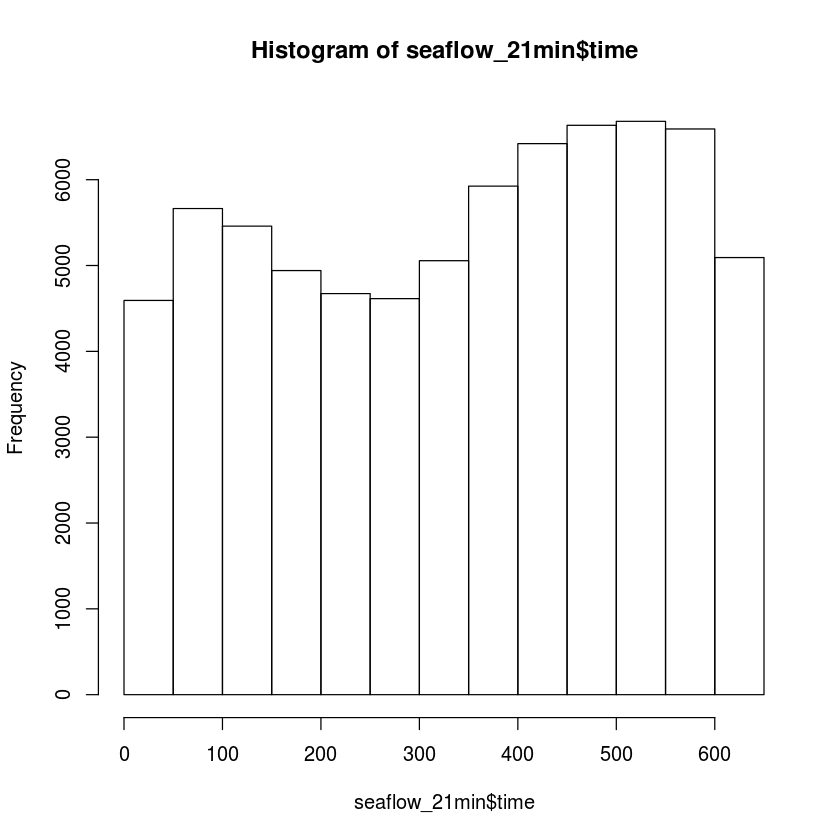

In [10]:
hist(seaflow_21min$time)

In [14]:

install.packages("caret")
install.packages("rpart")
install.packages("tree")
install.packages("randomForest")
install.packages("e1071")
install.packages("ggplot2")


Installing package into ‘/home/gael/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)
also installing the dependency ‘withr’

Installing package into ‘/home/gael/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)
Installing package into ‘/home/gael/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)
Installing package into ‘/home/gael/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)
Installing package into ‘/home/gael/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)
Installing package into ‘/home/gael/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)


In [15]:
require(caret)

Loading required package: caret


### Split the data into test and training sets

In [98]:
trainIndex <- createDataPartition(seaflow_21min$pop, p = 0.5, list = FALSE, times = 1)

seaflow_train = seaflow_21min[trainIndex,]
seaflow_test = seaflow_21min[-trainIndex,]

In [100]:
summary(seaflow_test)

    file_id           time          cell_id            d1       
 Min.   :203.0   Min.   : 12.0   Min.   :    0   Min.   : 1328  
 1st Qu.:204.0   1st Qu.:174.0   1st Qu.: 7544   1st Qu.: 7280  
 Median :206.0   Median :362.0   Median :15016   Median :17728  
 Mean   :206.2   Mean   :341.8   Mean   :15011   Mean   :17035  
 3rd Qu.:208.0   3rd Qu.:503.0   3rd Qu.:22379   3rd Qu.:24480  
 Max.   :209.0   Max.   :643.0   Max.   :32057   Max.   :53456  
       d2          fsc_small        fsc_perp        fsc_big     
 Min.   :   32   Min.   :10005   Min.   :    0   Min.   :32384  
 1st Qu.: 9568   1st Qu.:31397   1st Qu.:13555   1st Qu.:32400  
 Median :18592   Median :35517   Median :18096   Median :32400  
 Mean   :17472   Mean   :34943   Mean   :17665   Mean   :32405  
 3rd Qu.:24720   3rd Qu.:39203   3rd Qu.:22243   3rd Qu.:32416  
 Max.   :54096   Max.   :65424   Max.   :62173   Max.   :32464  
       pe          chl_small        chl_big           pop       
 Min.   :    0   Min.   :

In [101]:
summary(seaflow_train$time)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   12.0   174.0   361.0   341.2   502.0   643.0 

In [102]:
require(ggplot2)

### Plot data : 
### wavelength corresponding to chlorophyll (chl_small) as function of phycoerythrin fluorescence (pe)

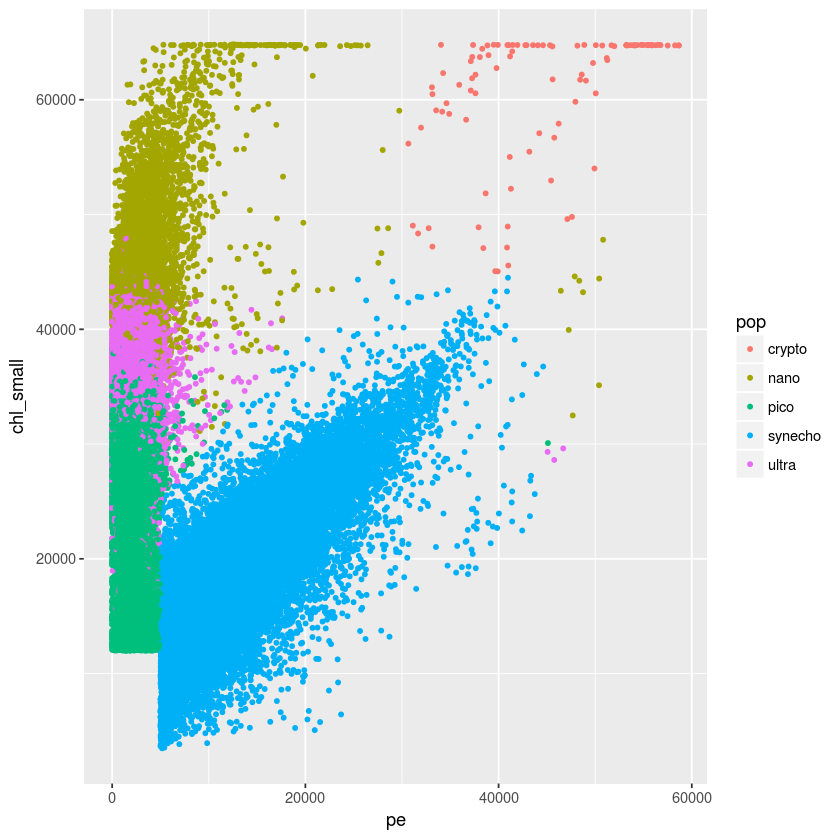

In [103]:
p <- ggplot(data=seaflow_21min, aes(x=pe, y=chl_small, colour=pop)) 
p <- p + geom_point(size=1)
print(p)

### Train a tree as a function of the sensor measurements: fsc_small + fsc_perp + chl_small + pe + chl_big + chl_small

In [104]:
require(rpart)

In [121]:
fol <- formula(pop ~ fsc_small + fsc_perp + fsc_big + pe + chl_big + chl_small)
model <- rpart(fol, method="class", data = seaflow_train)

In [122]:
print(model)

n= 36172 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 36172 25742 pico (0.0014 0.18 0.29 0.25 0.28)  
   2) pe< 5001.5 26353 15960 pico (0 0.22 0.39 0 0.38)  
     4) chl_small< 32465.5 11759  2190 pico (0 0.00026 0.81 0 0.19) *
     5) chl_small>=32465.5 14594  6656 ultra (0 0.4 0.056 0 0.54)  
      10) chl_small>=41292 5181   663 nano (0 0.87 0.00019 0 0.13) *
      11) chl_small< 41292 9413  2137 ultra (0 0.14 0.087 0 0.77) *
   3) pe>=5001.5 9819   746 synecho (0.0052 0.052 0.0038 0.92 0.015)  
     6) chl_small>=38255 629   131 nano (0.081 0.79 0 0.059 0.068) *
     7) chl_small< 38255 9190   154 synecho (0 0.0017 0.004 0.98 0.011) *


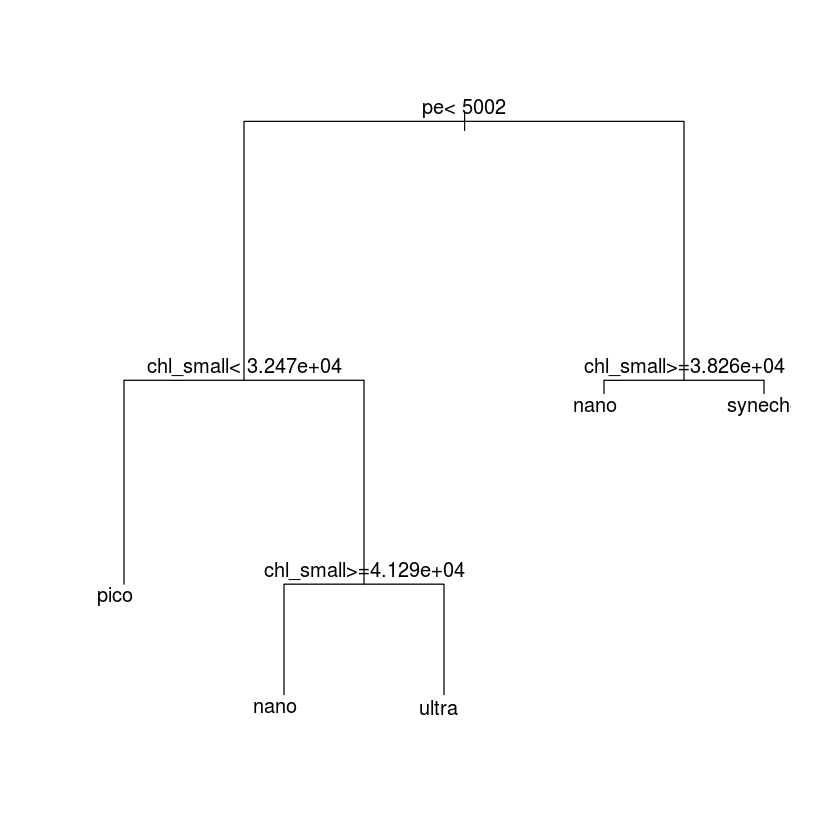

In [123]:
plot(model)
text(model)

### Evaluate the decision tree on the test data.

In [156]:
pred <- predict( model, seaflow_test, type = "class")

In [153]:
summary(pred)

crypto    nano    pico synecho   ultra 
      0    5810   11759    9190    9413

In [157]:
head(seaflow_train)

,file_id,time,cell_id,d1,d2,fsc_small,fsc_perp,fsc_big,pe,chl_small,chl_big,pop
1,203,12,1,25344,27968,34677,14944,32400,2216,28237,5072,pico
2,203,12,4,12960,22144,37275,20440,32400,1795,36755,14224,ultra
4,203,12,9,7712,14528,28744,10219,32416,1248,35392,10704,ultra
6,203,12,15,30032,22704,31221,13488,32400,1883,27323,6560,pico
7,203,12,17,28704,21664,37539,17944,32400,2107,34627,11072,ultra
10,203,12,26,31312,22608,34133,21829,32400,2525,28205,2336,pico


In [150]:
head(seaflow_test)

,file_id,time,cell_id,d1,d2,fsc_small,fsc_perp,fsc_big,pe,chl_small,chl_big,pop
3,203,12,6,21424,23008,31725,11253,32384,1901,26640,0,pico
5,203,12,11,30368,21440,28861,6101,32400,12989,23421,5920,synecho
8,203,12,23,17008,7072,38987,20315,32416,1509,36680,15072,ultra
9,203,12,24,4896,13104,25515,5995,32400,1952,29621,3040,pico
11,203,12,27,17056,23616,27157,11832,32400,25787,16771,0,synecho
13,203,12,33,29808,22208,30728,13261,32400,8491,15504,288,synecho


In [158]:
head(pred)

3       5       8       9      11      13 
   pico synecho   ultra    pico synecho synecho 
Levels: crypto nano pico synecho ultra

In [197]:
summary(pred == seaflow_test$pop)

   Mode   FALSE    TRUE 
logical    5173   30998 

### Build and evaluate a random forest

In [201]:
require(randomForest)

In [213]:
model_rf <- randomForest(fol, method="class", data = seaflow_train)

In [215]:
print(model_rf)


Call:
 randomForest(formula = fol, data = seaflow_train, method = "class") 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 8.2%
Confusion matrix:
        crypto nano  pico synecho ultra  class.error
crypto      49    1     0       1     0 0.0392156863
nano         0 5545     0       2   802 0.1266341156
pico         0    0 10082      10   338 0.0333652924
synecho      1    3     0    9068     1 0.0005510856
ultra        0  375  1421      10  8463 0.1758691207


In [217]:
pred_rf <- predict( model_rf, seaflow_test, type = "class")

In [218]:
summary(pred_rf == seaflow_test$pop)

   Mode   FALSE    TRUE 
logical    2793   33378 

In [219]:
importance(model_rf)

,MeanDecreaseGini
fsc_small,2662.269
fsc_perp,2118.212
fsc_big,201.942
pe,8919.975
chl_big,4757.845
chl_small,8193.657


### Train a support vector machine model and compare results

In [207]:
require(e1071)

Loading required package: e1071


In [220]:
model_svm <- svm(fol, data=seaflow_train)

print(model_svm)

In [222]:
pred_svm <- predict( model_svm, seaflow_test, type = "class")
summary(pred_svm == seaflow_test$pop)

   Mode   FALSE    TRUE 
logical    2813   33358 

### Confusion matrices

SVM:

In [223]:
table(pred = pred_svm, true = seaflow_test$pop)

         true
pred      crypto  nano  pico synecho ultra
  crypto      46     2     0       0     0
  nano         0  5651     0       3   379
  pico         0     0 10047      19  1321
  synecho      5     4    69    9051     5
  ultra        0   692   314       0  8563

Random Forest:

In [224]:
table(pred = pred_rf, true = seaflow_test$pop)

         true
pred      crypto  nano  pico synecho ultra
  crypto      49     2     0       0     0
  nano         0  5590     0       2   348
  pico         0     0 10090       0  1338
  synecho      2     3    14    9071     4
  ultra        0   754   326       0  8578

Decision Tree:

In [225]:
table(pred = pred, true = seaflow_test$pop)

         true
pred      crypto  nano  pico synecho ultra
  crypto      49     2     0       0     0
  nano         0  5589     0       2   349
  pico         0     0 10090       0  1338
  synecho      2     3    14    9071     4
  ultra        0   755   326       0  8577

In [227]:
head(seaflow_21min)

file_id,time,cell_id,d1,d2,fsc_small,fsc_perp,fsc_big,pe,chl_small,chl_big,pop
203,12,1,25344,27968,34677,14944,32400,2216,28237,5072,pico
203,12,4,12960,22144,37275,20440,32400,1795,36755,14224,ultra
203,12,6,21424,23008,31725,11253,32384,1901,26640,0,pico
203,12,9,7712,14528,28744,10219,32416,1248,35392,10704,ultra
203,12,11,30368,21440,28861,6101,32400,12989,23421,5920,synecho
203,12,15,30032,22704,31221,13488,32400,1883,27323,6560,pico


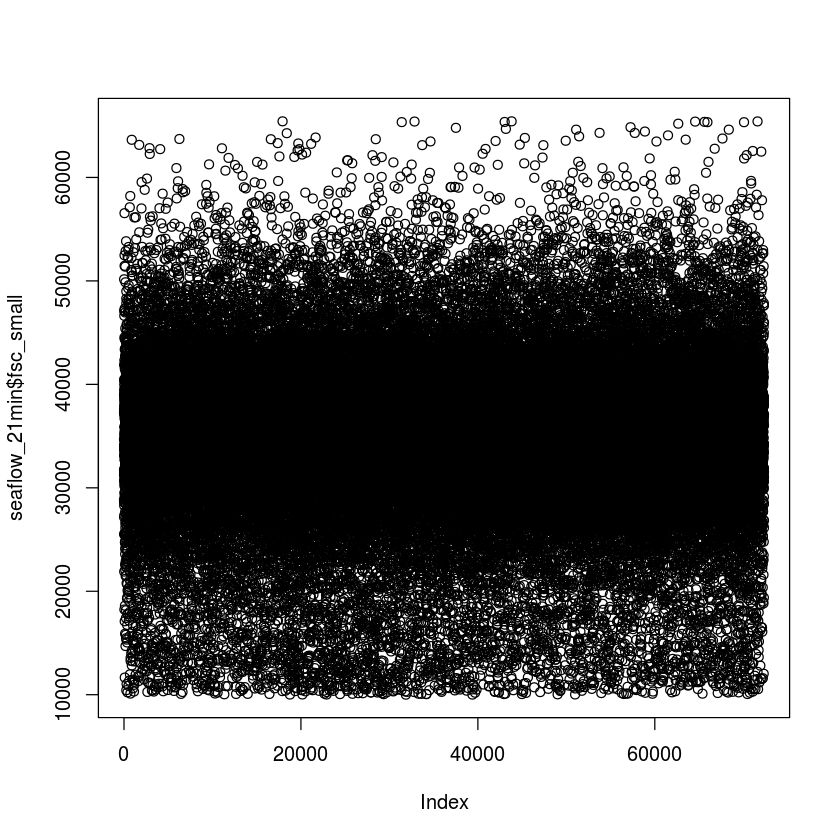

In [226]:
plot(seaflow_21min$fsc_small)

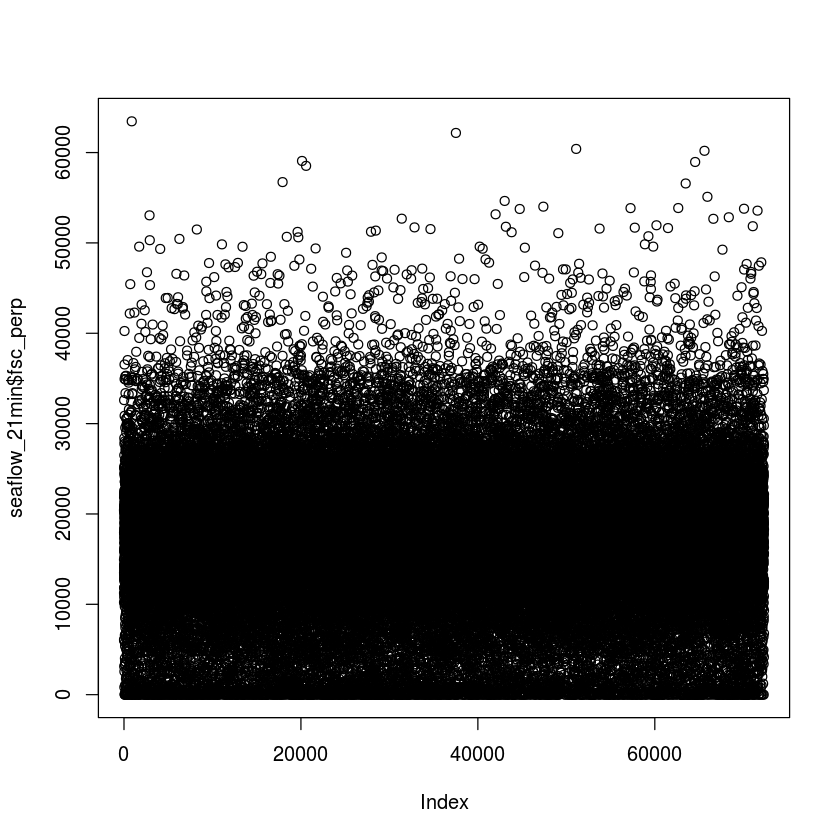

In [229]:
plot(seaflow_21min$fsc_perp)

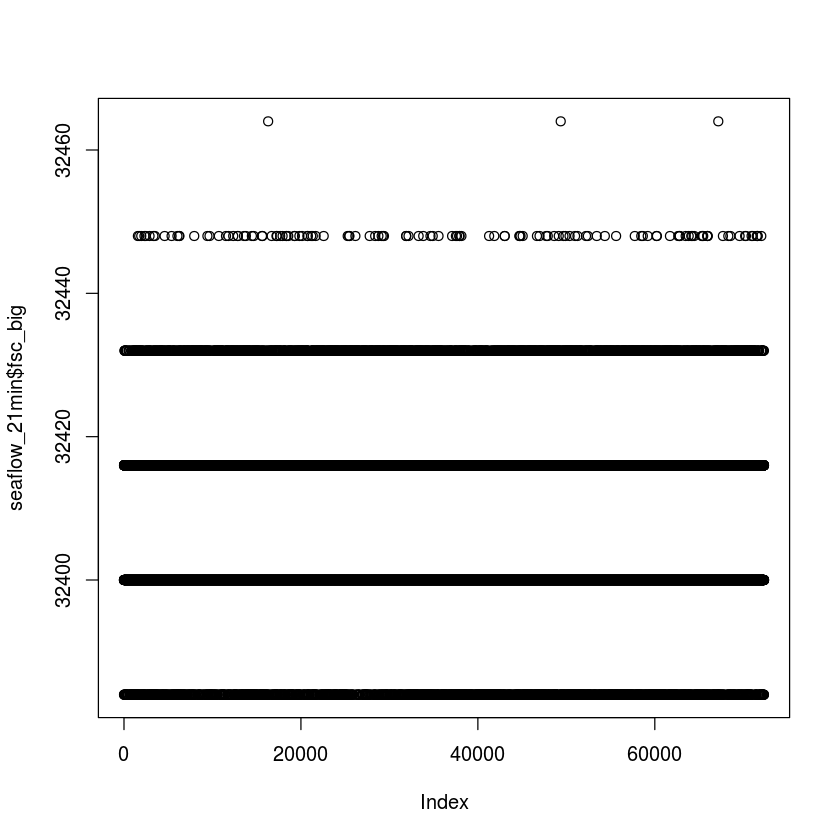

In [230]:
plot(seaflow_21min$fsc_big)

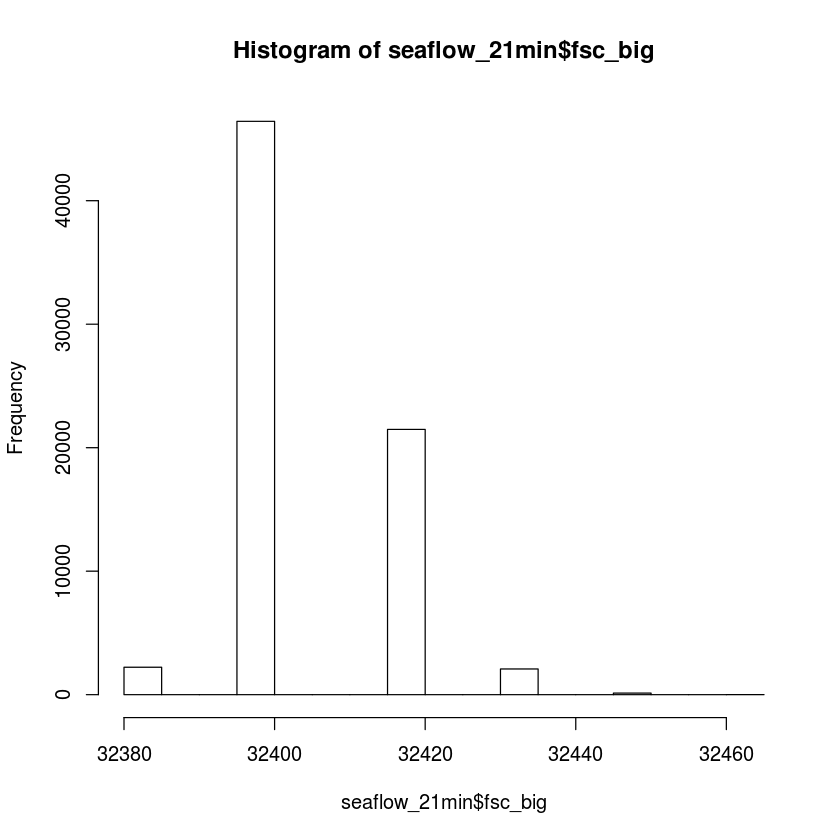

In [231]:
hist(seaflow_21min$fsc_big)

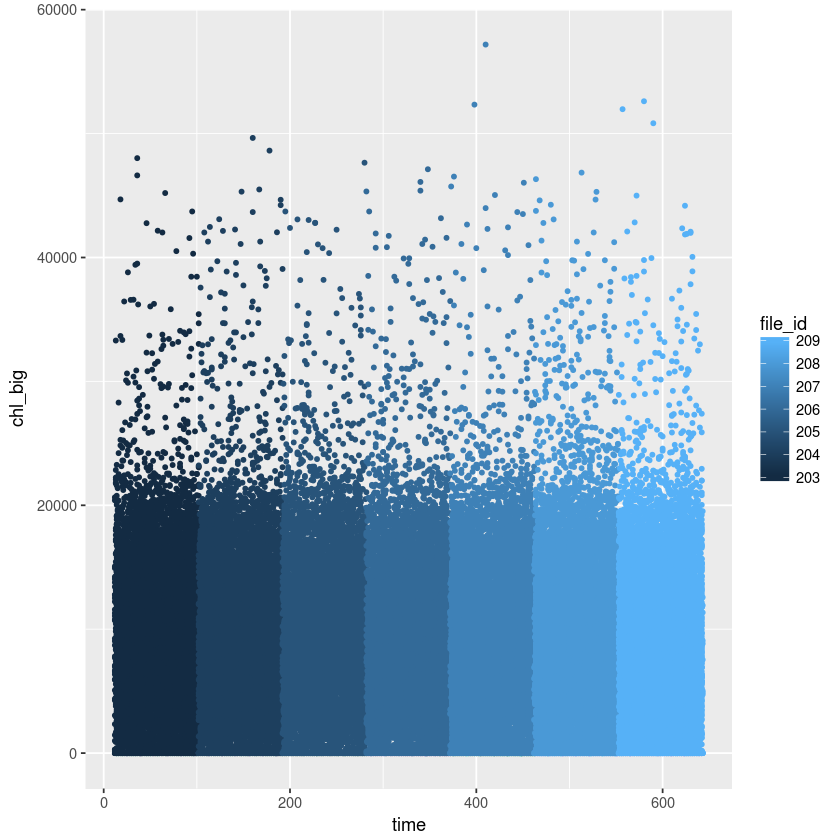

In [237]:
p2 <- ggplot(data=seaflow_21min, aes(x=time, y=chl_big, colour=file_id)) 
p2 <- p2 + geom_point(size=1)
print(p2)

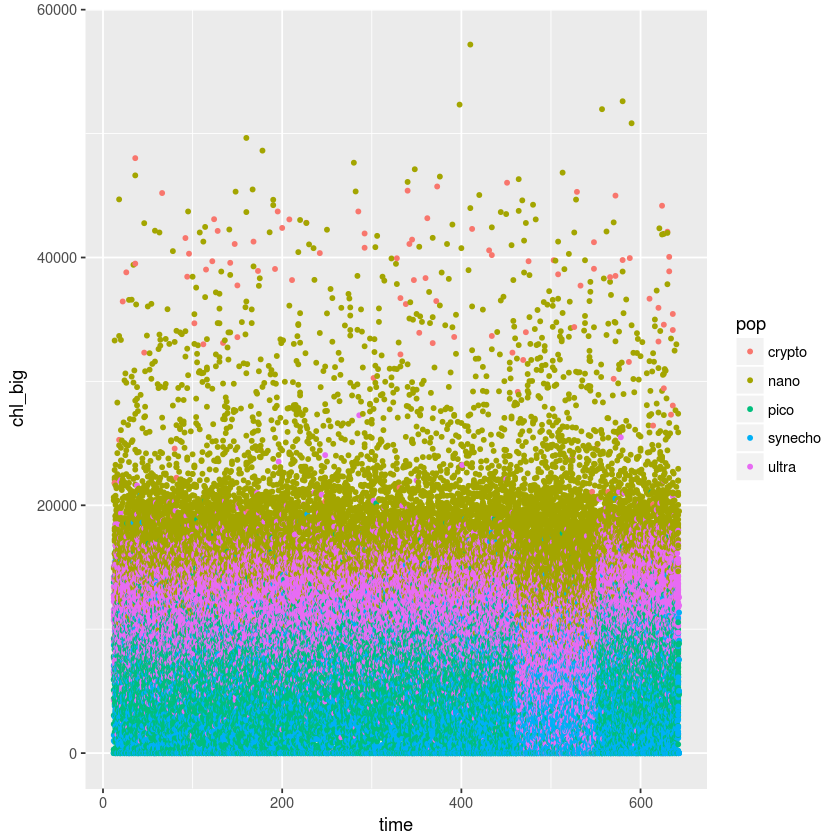

In [239]:
p3 <- ggplot(data=seaflow_21min, aes(x=time, y=chl_big, colour=pop)) 
p3 <- p3 + geom_point(size=1)
print(p3)

In [241]:
seaflow_corr = seaflow_21min[seaflow_21min$file_id != '208',]

In [243]:
summary(seaflow_corr)

    file_id           time          cell_id            d1       
 Min.   :203.0   Min.   : 12.0   Min.   :    0   Min.   : 1328  
 1st Qu.:204.0   1st Qu.:144.0   1st Qu.: 7373   1st Qu.: 7328  
 Median :206.0   Median :303.0   Median :14797   Median :17792  
 Mean   :205.8   Mean   :308.4   Mean   :14789   Mean   :17084  
 3rd Qu.:207.0   3rd Qu.:435.0   3rd Qu.:22105   3rd Qu.:24576  
 Max.   :209.0   Max.   :643.0   Max.   :31316   Max.   :54048  
       d2          fsc_small        fsc_perp        fsc_big     
 Min.   :   32   Min.   :10005   Min.   :    0   Min.   :32384  
 1st Qu.: 9568   1st Qu.:31389   1st Qu.:13488   1st Qu.:32400  
 Median :18464   Median :35525   Median :18101   Median :32400  
 Mean   :17411   Mean   :34931   Mean   :17641   Mean   :32405  
 3rd Qu.:24640   3rd Qu.:39227   3rd Qu.:22280   3rd Qu.:32416  
 Max.   :54688   Max.   :65424   Max.   :63456   Max.   :32464  
       pe          chl_small        chl_big           pop       
 Min.   :    0   Min.   :

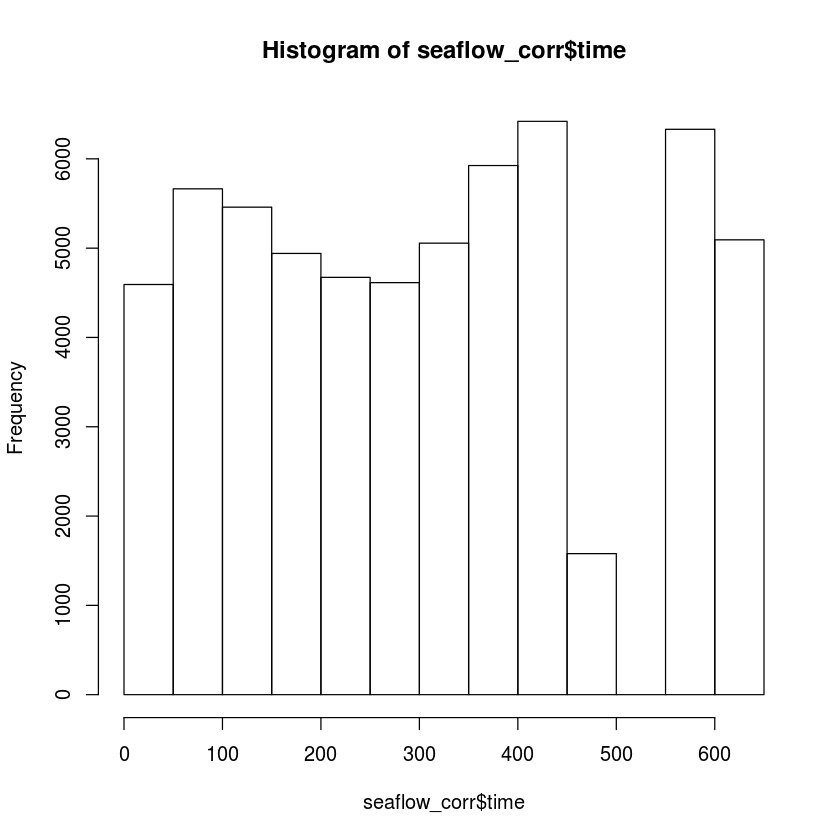

In [246]:
hist(seaflow_corr$time)

In [248]:
trainIndex <- createDataPartition(seaflow_corr$pop, p = 0.5, list = FALSE, times = 1)

seaflow_corr_train = seaflow_corr[trainIndex,]
seaflow_corr_test = seaflow_corr[-trainIndex,]
model_svm_corr <- svm(fol, data=seaflow_corr_train)

print(model_svm_corr)
pred_svm_corr <- predict( model_svm_corr, seaflow_corr_test, type = "class")
summary(pred_svm_corr == seaflow_corr_test$pop)


Call:
svm(formula = fol, data = seaflow_corr_train)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.1666667 

Number of Support Vectors:  3737



   Mode   FALSE    TRUE 
logical     853   29320 